###Análise e interpretação das ações da Tesla usando ferramentas e técnicas da área de Ciência de Dados <br>

> Aula em 02/08/2021 - Exercício feito durante a [live do Victor Barros](https://www.youtube.com/watch?v=UTIGbkKeSik)

In [ ]:
!pip install yfinance
import yfinance as yf #biblioteca 'Yahoo Finanças' para coleta de dados

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
ticker = "TSLA" #ação a ser analisada
start = '2019-1-1' #data de início da análise
end = '2021-07-31' #data final da análise

In [ ]:
df = yf.download(tickers = ticker, start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.info() #verificar se é um dataframe, se faltam dados, quais são os tipos dos dados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 650 entries, 2019-01-02 to 2021-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       650 non-null    float64
 1   High       650 non-null    float64
 2   Low        650 non-null    float64
 3   Close      650 non-null    float64
 4   Adj Close  650 non-null    float64
 5   Volume     650 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 35.5 KB


In [ ]:
df.describe().round(2) # 'round' traz os números com 2 casas decimais

,Open,High,Low,Close,Adj Close,Volume
count,650.00,650.00,650.00,650.00,650.00,6.500000e+02
mean,289.02,295.71,281.71,289.19,289.19,5.390175e+07
std,266.32,271.86,259.86,266.30,266.30,3.470111e+07
min,36.22,37.34,35.40,35.79,35.79,1.232800e+07
25%,57.86,58.94,56.61,58.04,58.04,3.022650e+07
50%,156.25,160.66,151.91,155.88,155.88,4.276950e+07
75%,578.67,596.57,560.81,576.12,576.12,6.837075e+07
max,891.38,900.40,871.60,883.09,883.09,3.046940e+08


>Verificando dados faltantes:

In [ ]:
df.isnull().sum() # método 'null' vai buscar se há dados faltantes e o 'sum' vai somar estes dados

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

>Verificando dados duplicados:

In [ ]:
df[df.duplicated()] #se não tiver observação, é porque não há dados duplicados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


###Analisando cada atributo do dataframe 

In [ ]:
df.head(0)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Por meio do `dtypes`, `describe`, `plot.hist`,` plot`, verificamos: qual é o tipo do atributo, as características estatísticas e a plotagem de um histograma e de um gráfico de série

>1. Open

In [ ]:
df["Open"].dtypes

dtype('float64')

In [ ]:
df["Open"].describe().round(2)

count    650.00
mean     289.02
std      266.32
min       36.22
25%       57.86
50%      156.25
75%      578.67
max      891.38
Name: Open, dtype: float64

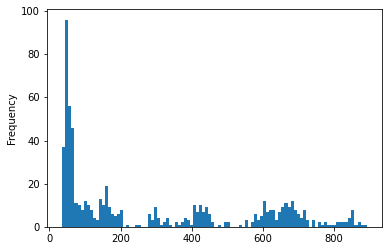

In [ ]:
df["Open"].plot.hist(bins=100)

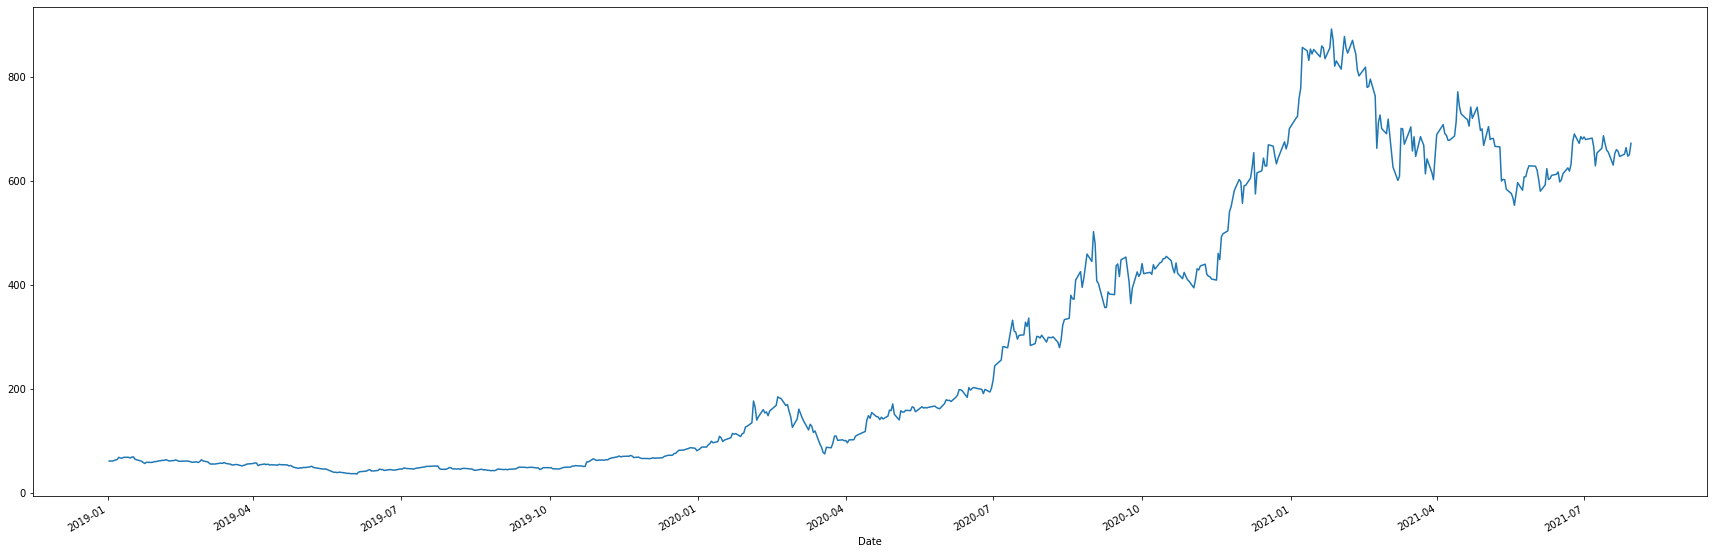

In [ ]:
df["Open"].plot(figsize=(30,10))

In [ ]:
df["Open"].max()

891.3800048828125

In [ ]:
df[df['Open']== 891.3800048828125].index.values #mostra qual é o dia que teve a aabertura com maior valor

array(['2021-01-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df.loc["2021-01-26"].round(2) #localiza o dia e traz o detalhamento daquele item

Open              891.38
High              895.90
Low               871.60
Close             883.09
Adj Close         883.09
Volume       23131600.00
Name: 2021-01-26 00:00:00, dtype: float64

>2. High

In [ ]:
df['High'].dtype

dtype('float64')

In [ ]:
df["High"].describe().round(2)

count    650.00
mean     295.71
std      271.86
min       37.34
25%       58.94
50%      160.66
75%      596.57
max      900.40
Name: High, dtype: float64

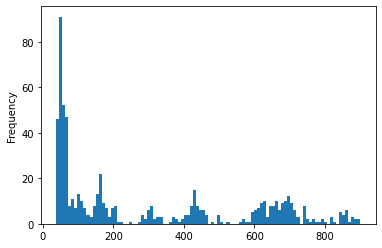

In [ ]:
df["High"].plot.hist(bins=100) 

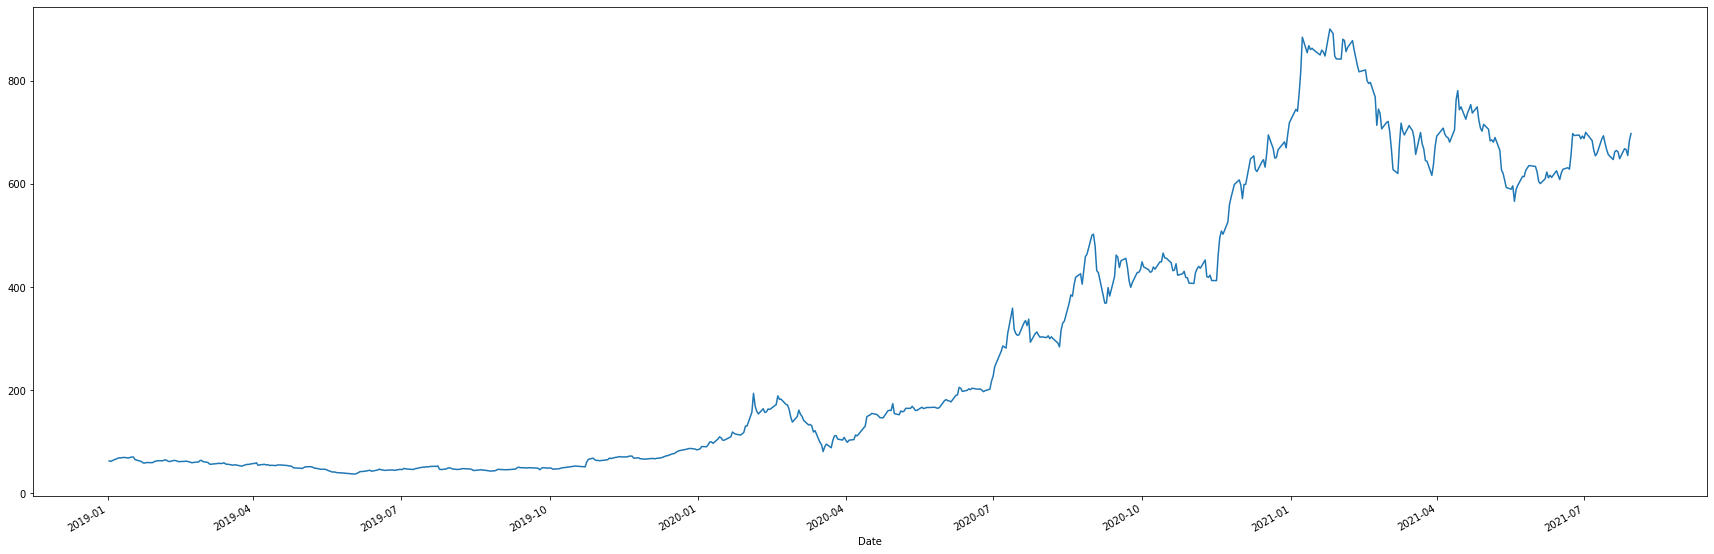

In [ ]:
df["High"].plot(figsize=(30,10))

>3. Low

In [ ]:
df['Low'].dtype

dtype('float64')

In [ ]:
df["Low"].describe().round(2)

count    650.00
mean     281.71
std      259.86
min       35.40
25%       56.61
50%      151.91
75%      560.81
max      871.60
Name: Low, dtype: float64

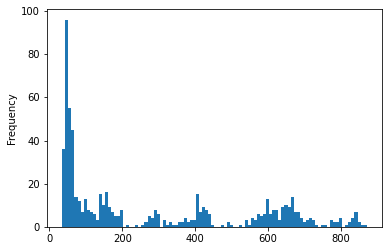

In [ ]:
df["Low"].plot.hist(bins=100) 

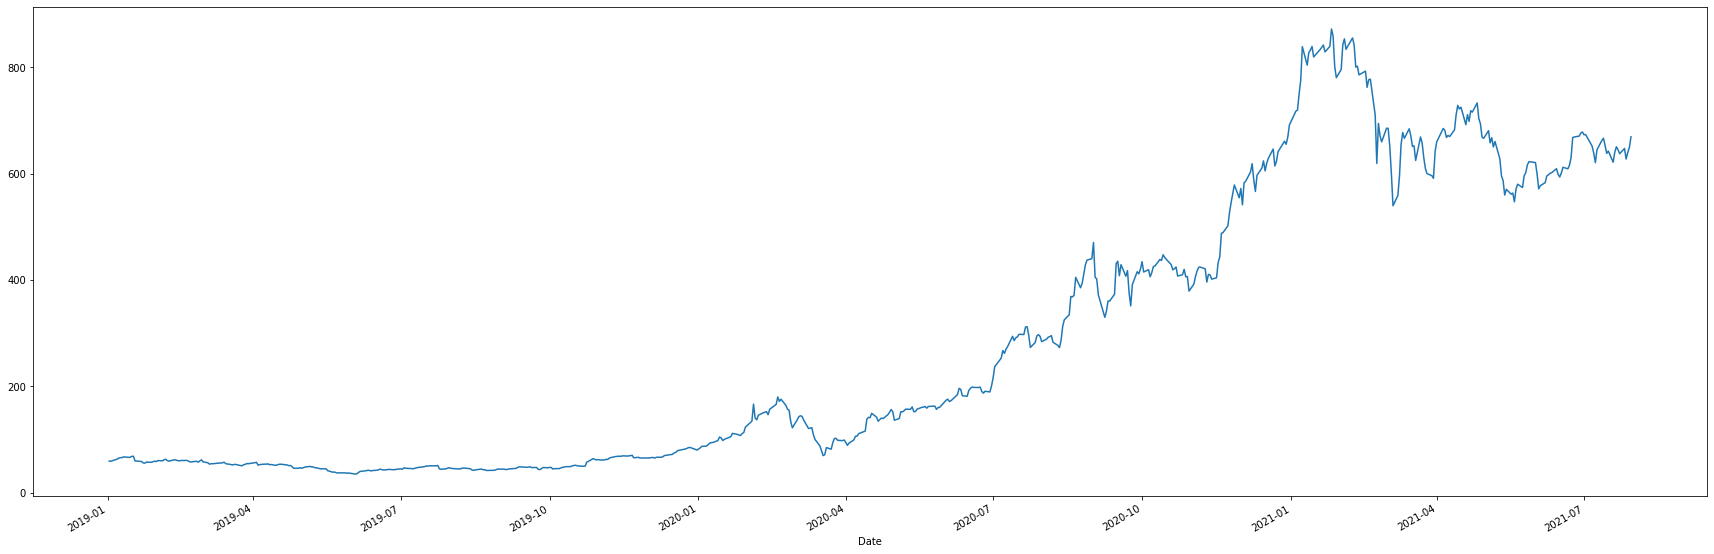

In [ ]:
df["Low"].plot(figsize=(30,10))

>4. Close

In [ ]:
df['Close'].dtype

dtype('float64')

In [ ]:
df["Close"].describe().round(2)

count    650.00
mean     289.19
std      266.30
min       35.79
25%       58.04
50%      155.88
75%      576.12
max      883.09
Name: Close, dtype: float64

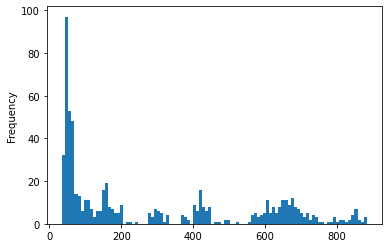

In [ ]:
df["Close"].plot.hist(bins=100) 

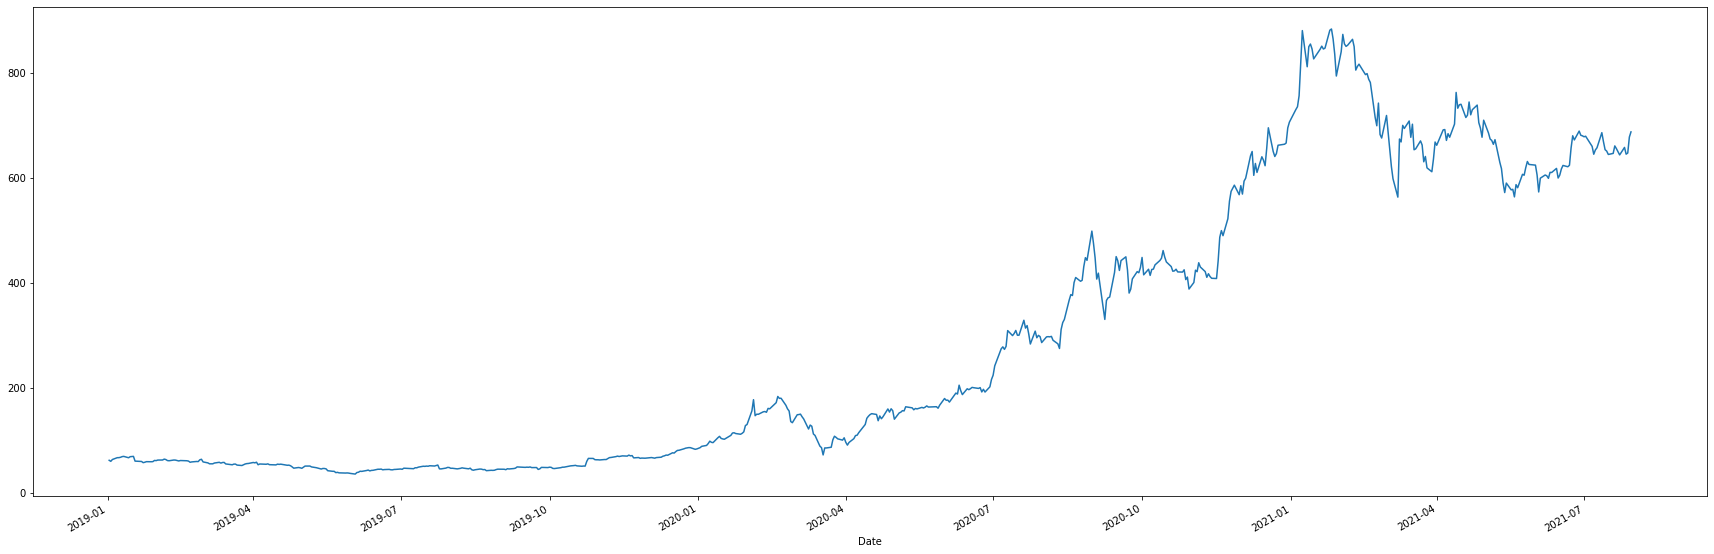

In [ ]:
df["Close"].plot(figsize=(30,10))

>5. Adj Close

In [ ]:
df.rename(columns={"Adj Close": "Adj_Close"}, inplace = True)

In [ ]:
df["Adj_Close"].dtypes

dtype('float64')

In [ ]:
df["Adj_Close"].describe().round(2)

count    650.00
mean     289.19
std      266.30
min       35.79
25%       58.04
50%      155.88
75%      576.12
max      883.09
Name: Adj_Close, dtype: float64

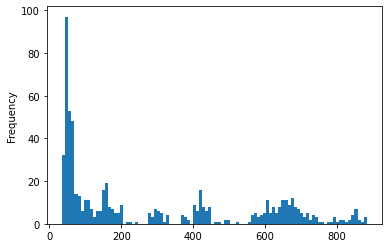

In [ ]:
df["Adj_Close"].plot.hist(bins=100) 

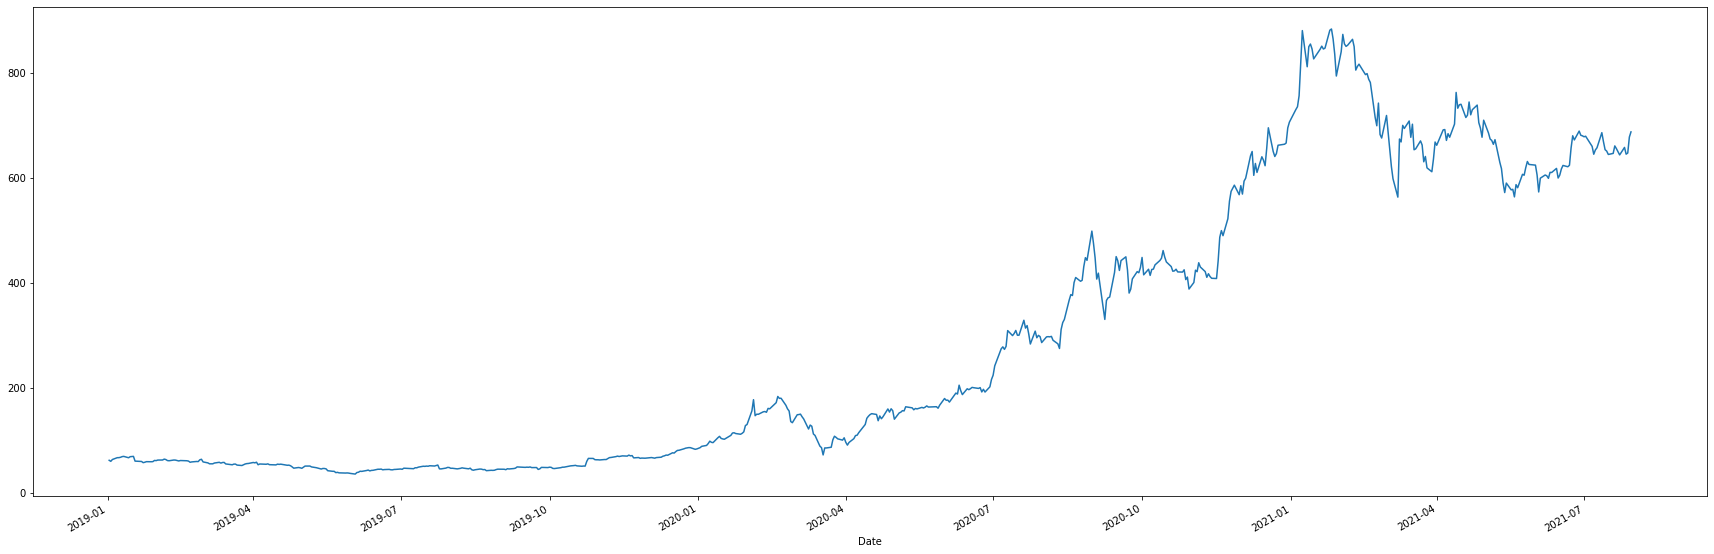

In [ ]:
df["Adj_Close"].plot(figsize=(30,10))

###ROI - Retorno sobre investimento

[Adj_Close (hoje) / Adj_Close (Ontem)] - 1

In [ ]:
df['Return'] = df["Adj_Close"].pct_change(1)
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Return
Date,,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000,NaN
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000,-0.031472
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500,0.057697
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000,0.054361
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500,0.001164


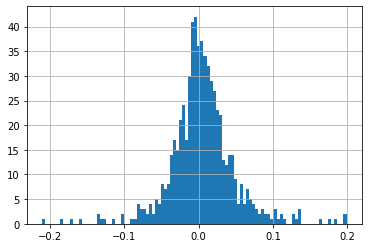

In [ ]:
df["Return"].hist(bins=100) #distribuição do retorno

<function matplotlib.pyplot.show>

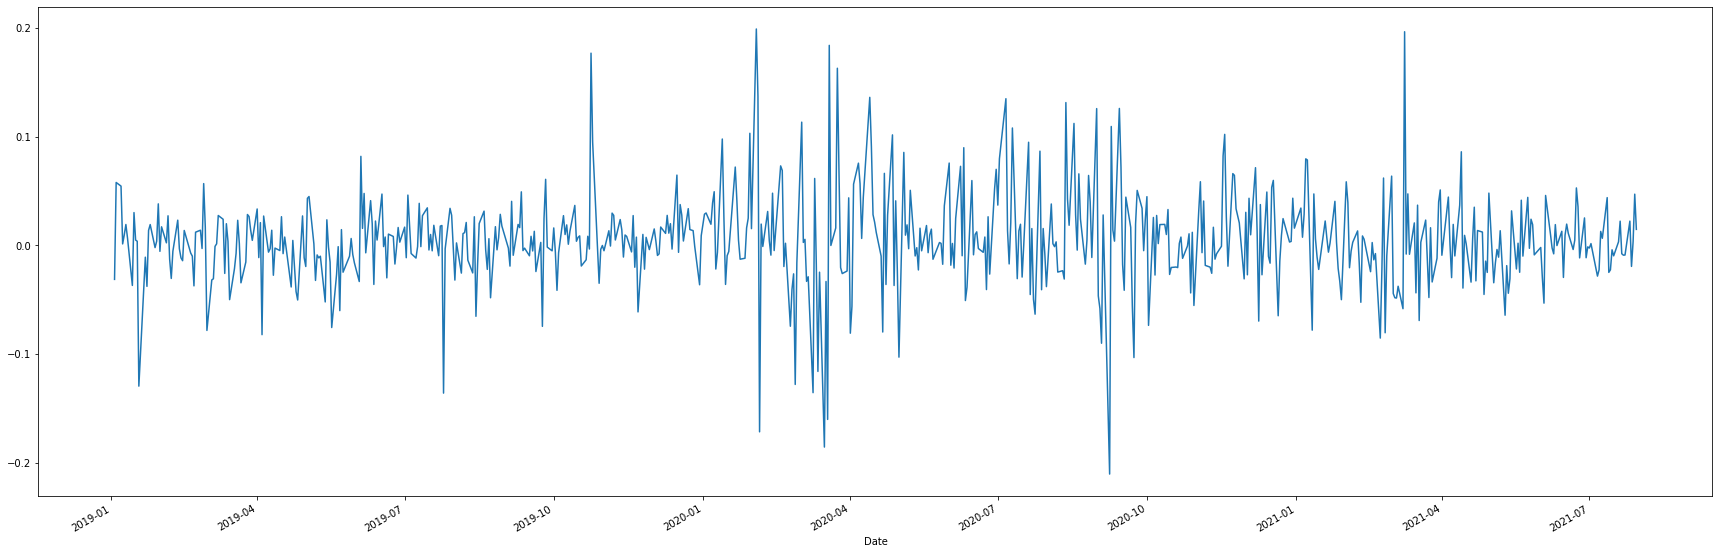

In [ ]:
df["Return"].plot(figsize=(30,10)) #variação do retorno
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


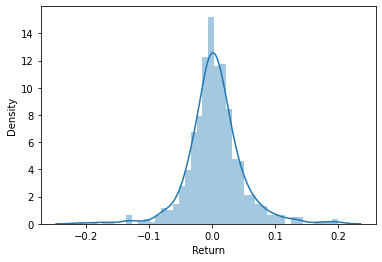

In [ ]:
sns.distplot(df["Return"]) #distribuição do Retorno com uma curva normal
plt.show()

###Média móvel

In [ ]:
vinte_dias = df["Close"].rolling(window=20).mean()
vinte_dias

Date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
                 ...    
2021-07-26    661.734998
2021-07-27    659.538000
2021-07-28    657.848999
2021-07-29    657.731497
2021-07-30    658.195499
Name: Close, Length: 650, dtype: float64

In [ ]:
cem_dias = df["Close"].rolling(window=100).mean()
cem_dias

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2021-07-26    652.6318
2021-07-27    652.8652
2021-07-28    653.3555
2021-07-29    654.4990
2021-07-30    654.6352
Name: Close, Length: 650, dtype: float64

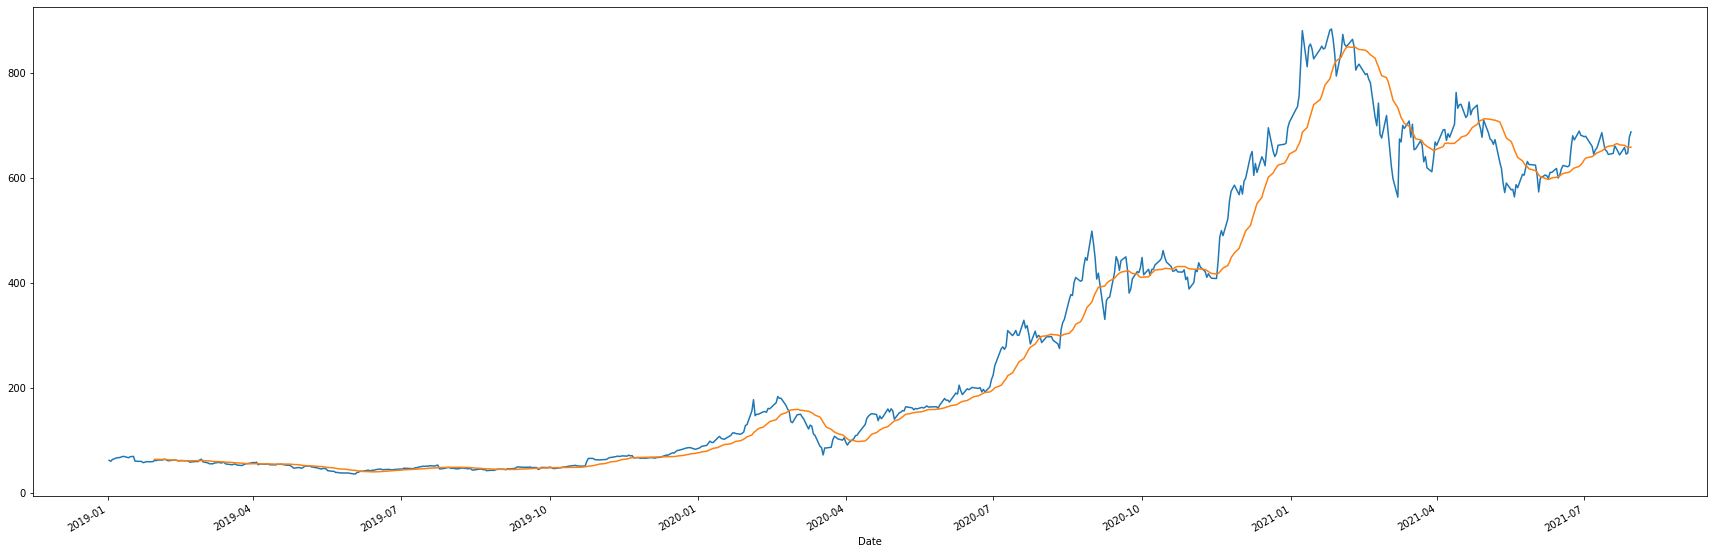

In [ ]:
#plotando a tendência de alta ou baixa num intervalo de tempo
df["Close"].plot(figsize=(30,10), label = "TSLA")
df["Close"].rolling(20).mean().plot(label="20 dias")

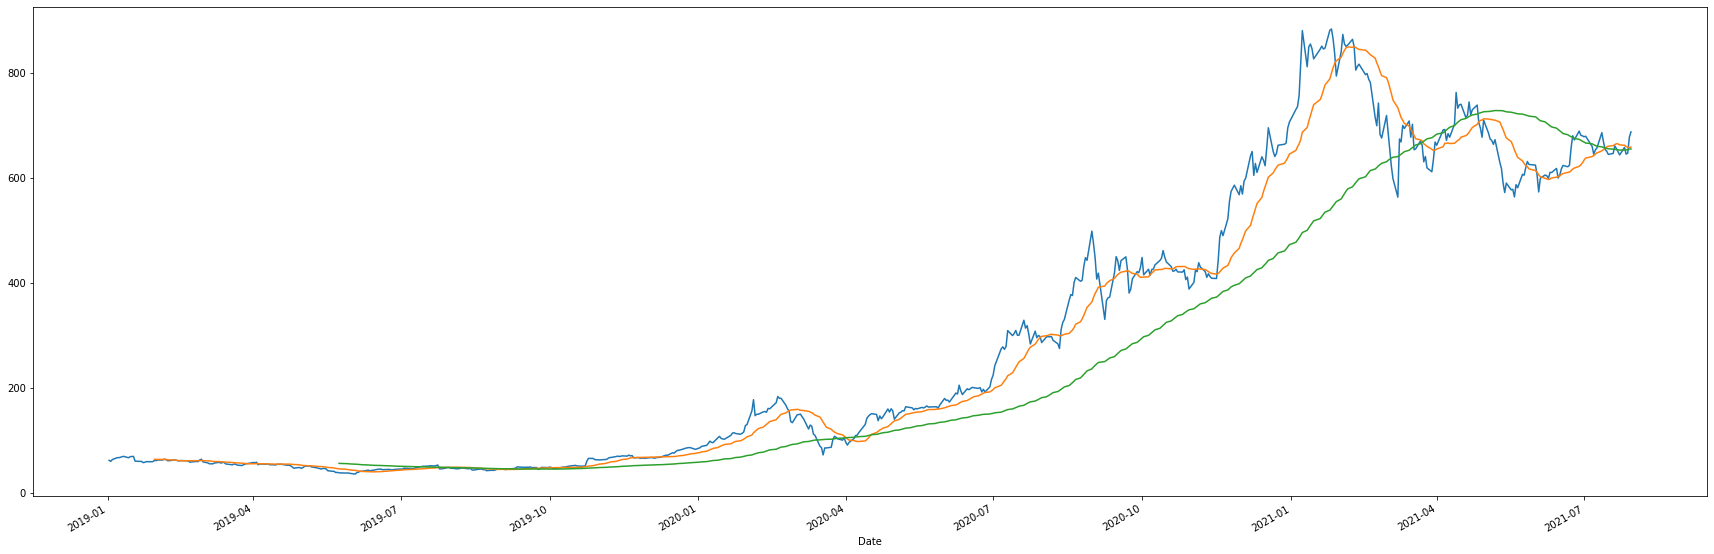

In [ ]:
df["Close"].plot(figsize=(30,10), label = "TSLA")
df["Close"].rolling(20).mean().plot(label="20 dias")
df["Close"].rolling(100).mean().plot(label="100 dias")

###RSI
Indicador que mede a magnitude das mudanças recentes de preços para avaliar as condições de overbought (sobrecompra) ou oversold (sobrevenda) de uma ação. Ajuda a determinar sinais de negociação.

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Return       1
dtype: int64

In [ ]:
diff = df["Close"].diff().dropna() #dropna retira dados faltantes, s etiver

In [ ]:
diff

Date
2019-01-03    -1.952000
2019-01-04     3.466000
2019-01-07     3.453999
2019-01-08     0.078003
2019-01-09     0.636002
                ...    
2021-07-26    14.239990
2021-07-27   -12.839966
2021-07-28     2.199951
2021-07-29    30.369995
2021-07-30     9.850037
Name: Close, Length: 649, dtype: float64

In [ ]:
up = diff.map(lambda x:x if x > 0 else 0).rename('Up')
print(up)

Date
2019-01-03     0.000000
2019-01-04     3.466000
2019-01-07     3.453999
2019-01-08     0.078003
2019-01-09     0.636002
                ...    
2021-07-26    14.239990
2021-07-27     0.000000
2021-07-28     2.199951
2021-07-29    30.369995
2021-07-30     9.850037
Name: Up, Length: 649, dtype: float64


In [ ]:
down = diff.map(lambda x: -1*x if x < 0 else 0).rename('Down')
print(down)

Date
2019-01-03     1.952000
2019-01-04     0.000000
2019-01-07     0.000000
2019-01-08     0.000000
2019-01-09     0.000000
                ...    
2021-07-26     0.000000
2021-07-27    12.839966
2021-07-28     0.000000
2021-07-29     0.000000
2021-07-30     0.000000
Name: Down, Length: 649, dtype: float64


In [ ]:
rsi = pd.concat([diff, up, down], axis = 1)
rsi.head()

,Close,Up,Down
Date,,,
2019-01-03,-1.952000,0.000000,1.952
2019-01-04,3.466000,3.466000,0.000
2019-01-07,3.453999,3.453999,0.000
2019-01-08,0.078003,0.078003,0.000
2019-01-09,0.636002,0.636002,0.000


In [ ]:
rsi["Up_Media"] = rsi["Up"][0:14].sum()/14 #acessando os primeiros 14 dados de Up no dataframe 'sri'

In [ ]:
rsi["Down_Media"] = rsi["Down"][0:14].sum()/14 #acessando os primeiros 14 dados de Down no dataframe 'sri'

In [ ]:
rsi.head()

,Close,Up,Down,Up_Media,Down_Media
Date,,,,,
2019-01-03,-1.952000,0.000000,1.952,0.854429,1.176286
2019-01-04,3.466000,3.466000,0.000,0.854429,1.176286
2019-01-07,3.453999,3.453999,0.000,0.854429,1.176286
2019-01-08,0.078003,0.078003,0.000,0.854429,1.176286
2019-01-09,0.636002,0.636002,0.000,0.854429,1.176286


In [ ]:
for i in range(14, rsi['Close'].size):
  rsi["Up_Media"].iloc[i] = (rsi["Up"].iloc[i] + 13 * rsi["Up_Media"].iloc[i-1]/14)
  rsi["Down_Media"].iloc[i] = (rsi["Down"].iloc[i] + 13 * rsi["Down_Media"].iloc[i-1]/14)

In [ ]:
rsi.tail() #para verificar se há variação nos últimos 14 dias

,Close,Up,Down,Up_Media,Down_Media
Date,,,,,
2021-07-26,14.239990,14.239990,0.000000,75.107583,67.959406
2021-07-27,-12.839966,0.000000,12.839966,69.742756,75.945128
2021-07-28,2.199951,2.199951,0.000000,66.961081,70.520476
2021-07-29,30.369995,30.369995,0.000000,92.548142,65.483299
2021-07-30,9.850037,9.850037,0.000000,95.787597,60.805921


In [ ]:
rsi["RSI"] = 100 - 100 / (1 + rsi["Up_Media"] / rsi["Down_Media"])

In [ ]:
rsi.head()

,Close,Up,Down,Up_Media,Down_Media,RSI
Date,,,,,,
2019-01-03,-1.952000,0.000000,1.952,0.854429,1.176286,42.075281
2019-01-04,3.466000,3.466000,0.000,0.854429,1.176286,42.075281
2019-01-07,3.453999,3.453999,0.000,0.854429,1.176286,42.075281
2019-01-08,0.078003,0.078003,0.000,0.854429,1.176286,42.075281
2019-01-09,0.636002,0.636002,0.000,0.854429,1.176286,42.075281


###Medidas de assimetria

Indicador que mede a magnitude das mudanças recentes de preços para avaliar as condições de overbought (sobrecompra) ou oversold (sobrevenda) de uma ação.

In [ ]:
df["Return"].skew()

0.13087142938434207

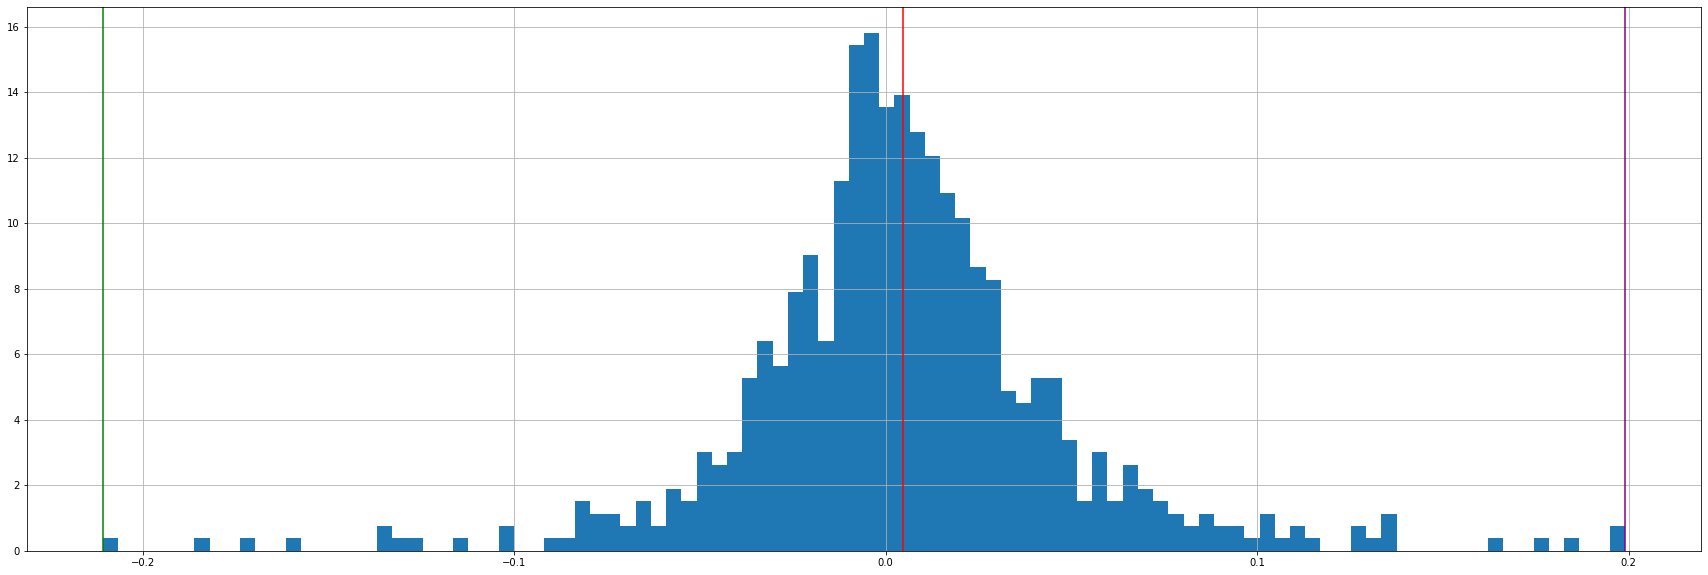

In [ ]:
df["Return"].hist(bins=100, density=True, figsize=(30,10))
plt.axvline(df["Return"].mean(), label='mean', color="red") #média
plt.axvline(df["Return"].min(), label='low', color="green") #mínimo
plt.axvline(df["Return"].max(), label='high', color="purple") #máximo

###Medidas de curtose
Indica a concentração de valores no centro ou nas caudas de uma distribuição. Descreve o grau de achatamento.

In [ ]:
df["Return"].kurtosis()

4.265872254308224

Quando > 3, indica maior probabilidade de movimentos extremos

###Exemplo de estratégia

Se o valor de fechamento for acima da média de fechamento, comprar a ação

In [ ]:
media_close = df['Close'].mean()
media_close

289.1855689239502

In [ ]:
df.loc[df["Close"] <= media_close, "Buy"] = 1
df.loc[df["Close"] > media_close, "Buy"] = 0
df["Buy"] = df['Buy'].astype(int)
df.head()

,Open,High,Low,Close,Adj_Close,Volume,Return,Buy
Date,,,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000,NaN,1
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000,-0.031472,1
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500,0.057697,1
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000,0.054361,1
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500,0.001164,1
